In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
import tensorflow as tf
import cv2
import keras
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To test the avilability of GPU!
print(tf.test.is_gpu_available())

False


In [3]:
print(tf.__version__)

1.3.0


In [4]:
keras.__version__

'2.1.3'

In [5]:
from keras.models import load_model
model = load_model('Model/facenet_keras.h5')

In [6]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]

In [7]:
model.outputs

[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]

In [8]:
# model.summary()

In [16]:
import mtcnn

In [17]:
image1 = cv2.imread('images/santosh1.jpg')
image2 = cv2.imread('images/santosh2.jpg')
image3 = cv2.imread('images/santosh3.jpg')
image4 = cv2.imread('images/santosh4.jpeg')
image5 = cv2.imread('images/santosh image.JPG')

In [18]:
cv2.imshow('Display',image1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
from mtcnn.mtcnn import MTCNN
mtcnn = MTCNN()

In [21]:
mtcnn.detect_faces()

In [24]:
arr = asarray(image1)

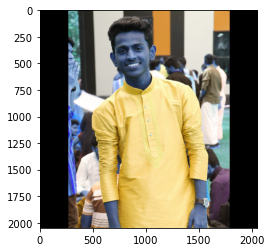

In [26]:
plt.imshow(arr)